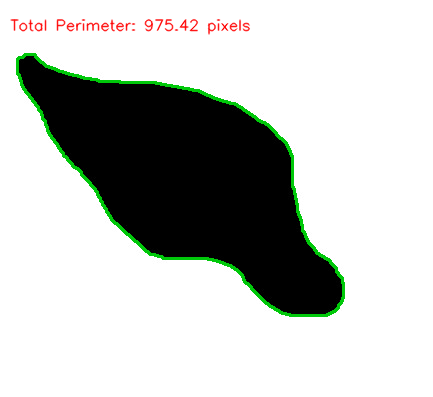

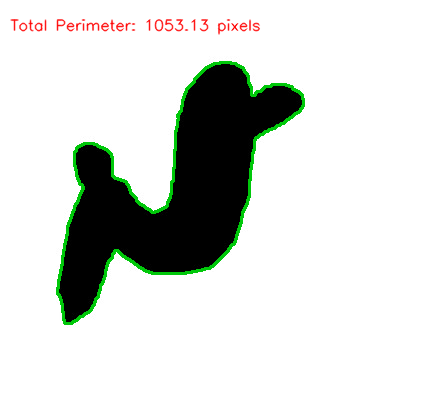

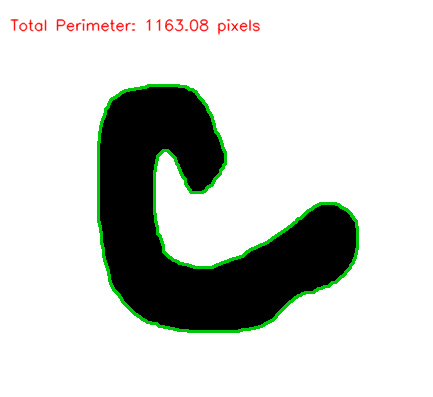

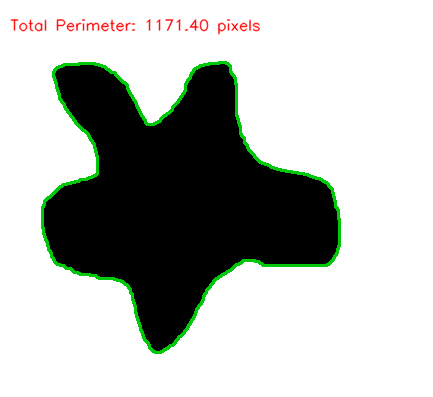

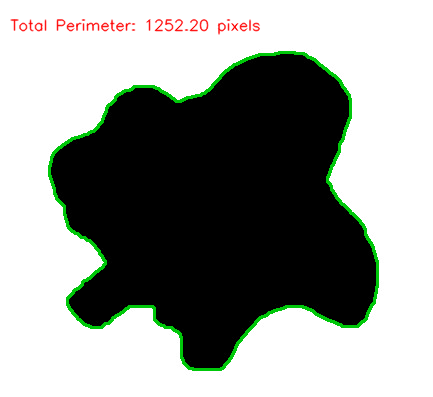

In [41]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_perimeter(contours):
    total_perimeter = 0
    for contour in contours:

        perimeter = cv2.arcLength(contour, True)
        total_perimeter += perimeter

    return total_perimeter

image_files = ['/content/im1.jpg','/content/im2.jpg', '/content/im3.jpg','/content/im4.jpg','/content/im5.jpg']

for image_file in image_files:
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    inverted_gray = 255 - blurred
    ret, binary_mask = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_perimeter = calculate_perimeter(contours)

    if len(contours) > 0:
        for contour in contours:
            cv2.drawContours(image, [contour], -1, (10,200,0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, f"Total Perimeter: {total_perimeter:.2f} pixels", (10, 30), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        cv2_imshow(image)
    else:
        print(f"No mineral particles found in {image_file}.")


### CIRCLE

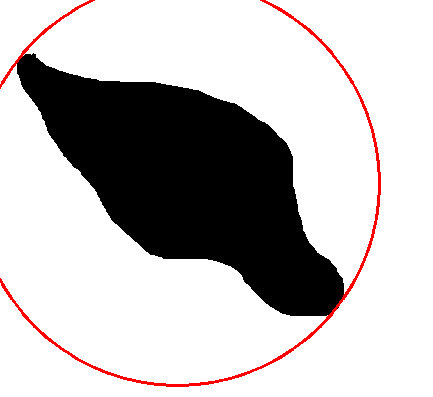

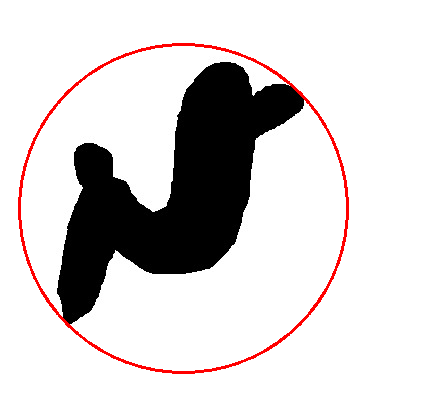

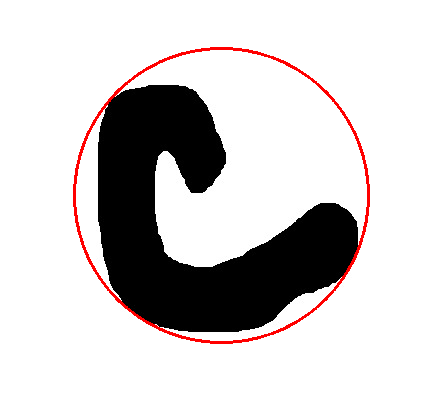

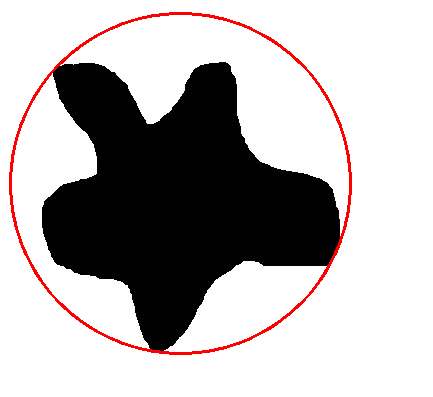

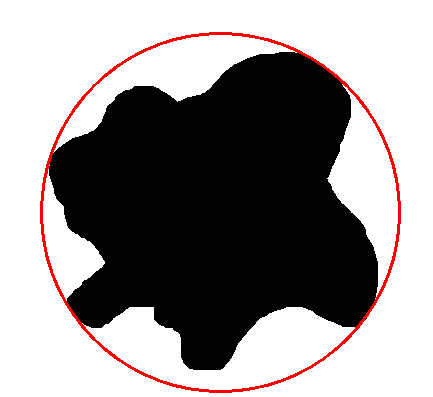

In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def fit_circles(contours):
    circles = []
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            circles.append((x, y, radius))

    return circles

image_files = ['/content/im1.jpg', '/content/im2.jpg', '/content/im3.jpg','/content/im4.jpg','/content/im5.jpg']

for image_file in image_files:
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    inverted_gray = 255 - blurred
    ret, binary_mask = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    circles = fit_circles(contours)

    if len(contours) > 0:
        for circle_info in circles:
            x, y, radius = circle_info
            x, y, radius = int(x), int(y), int(radius)
            cv2.circle(image, (x, y), radius, (0, 0, 255), 2)
        cv2_imshow(image)
    else:
        print(f"No mineral particles found in {image_file}.")


### MAJOR AXIS


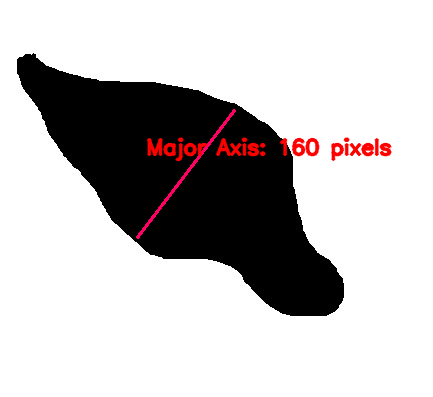

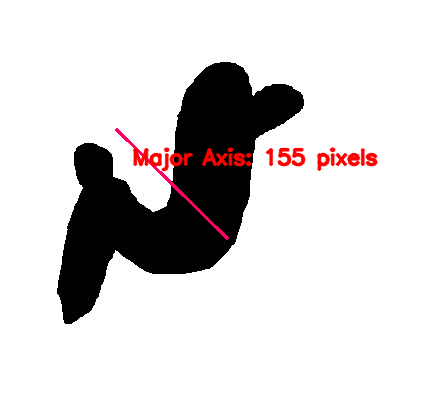

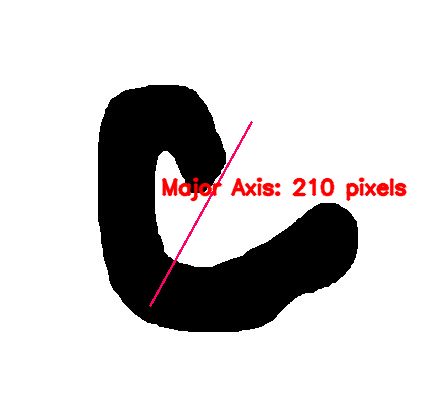

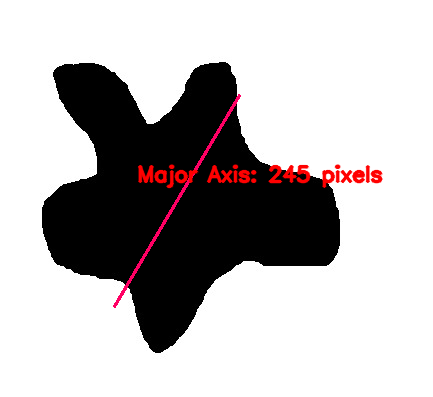

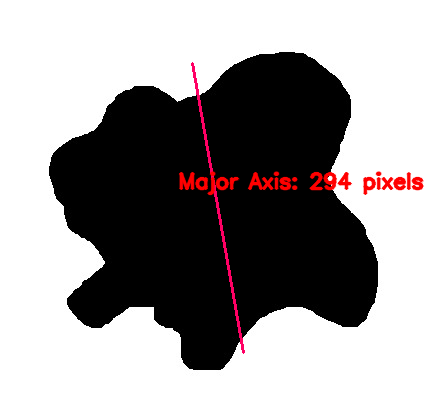

In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_major_axis(contours):
    major_axes = []
    for contour in contours:
        if len(contour) >= 5:
            (x0, y0), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
            major_axes.append((x0, y0, major_axis, angle))
    return major_axes
image_files = ['/content/im1.jpg', '/content/im2.jpg', '/content/im3.jpg','/content/im4.jpg','/content/im5.jpg']

for image_file in image_files:
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    inverted_gray = 255 - blurred
    ret, binary_mask = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    major_axes = calculate_major_axis(contours)

    if len(contours) > 0:
        for major_axis_info in major_axes:
            x0, y0, major_axis, angle = major_axis_info
            x0, y0, major_axis = int(x0), int(y0), int(major_axis)
            endpoint1 = (
                int(x0 - 0.5 * major_axis * np.cos(np.radians(angle))),
                int(y0 - 0.5 * major_axis * np.sin(np.radians(angle)))
                )
            endpoint2 = (
                int(x0 + 0.5 * major_axis * np.cos(np.radians(angle))),
                int(y0 + 0.5 * major_axis * np.sin(np.radians(angle))
            ))
            cv2.line(image, endpoint1, endpoint2, (100,0, 255), 2)  # Red major axis line
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(image, f"Major Axis: {major_axis} pixels", (x0 - 40, y0 - 20), font, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
        cv2_imshow(image)
    else:
        print(f"No mineral particles found in {image_file}.")


### CENTROID

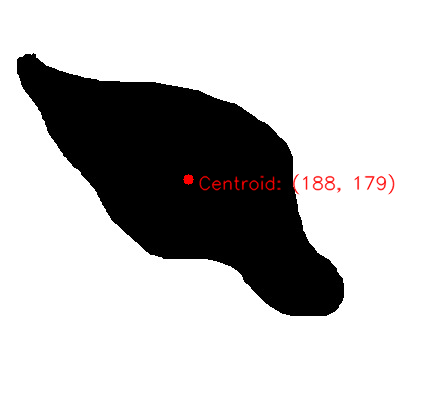

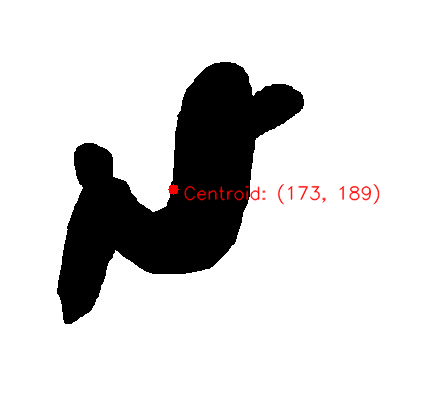

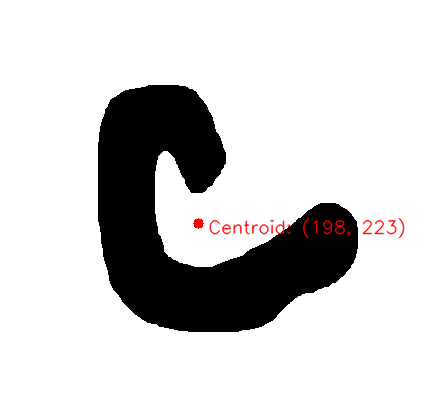

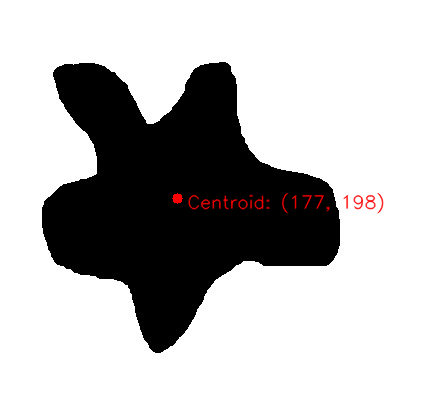

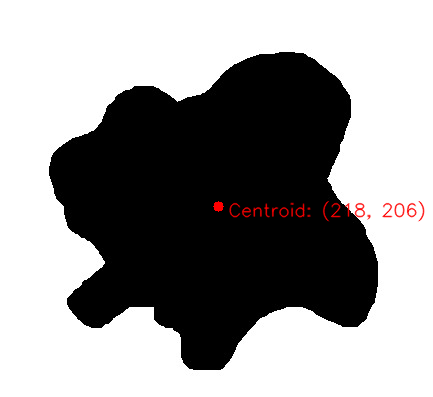

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_major_axis(contours):
    major_axes = []
    for contour in contours:
        if len(contour) >= 5:
            (x0, y0), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
            major_axes.append((x0, y0, major_axis, angle))

    return major_axes
image_files = ['/content/im1.jpg', '/content/im2.jpg', '/content/im3.jpg','/content/im4.jpg','/content/im5.jpg']

for image_file in image_files:
    image = cv2.imread(image_file)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    inverted_gray = 255 - blurred
    ret, binary_mask = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    major_axes = calculate_major_axis(contours)

    if len(contours) > 0:
        for major_axis_info in major_axes:
            M = cv2.moments(contours[0])
            if M['m00'] != 0:
                centroid_x = int(M['m10'] / M['m00'])
                centroid_y = int(M['m01'] / M['m00'])
                cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)  # Red circle

                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image, f"Centroid: ({centroid_x}, {centroid_y})", (centroid_x + 10, centroid_y + 10), font, 0.6, (0, 0, 255), 1, cv2.LINE_AA)

        cv2_imshow(image)
    else:
        print(f"No mineral particles found in {image_file}.")


### Total Surface Area

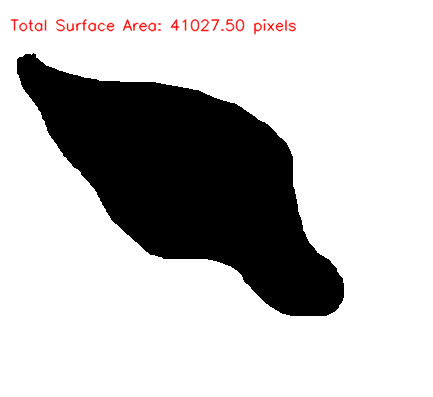

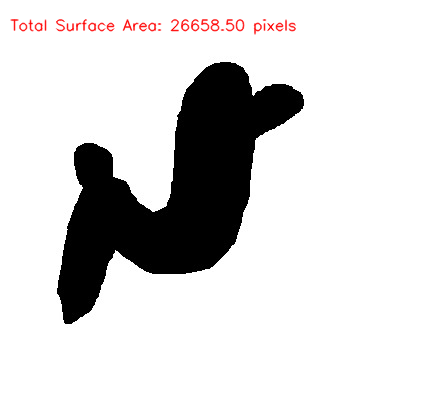

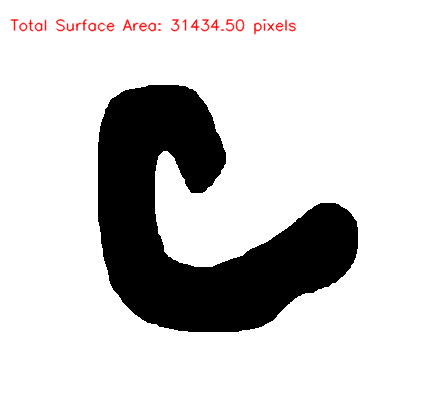

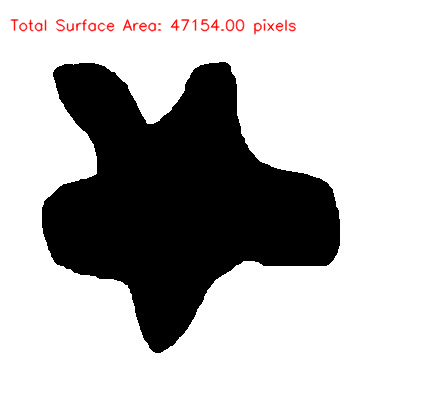

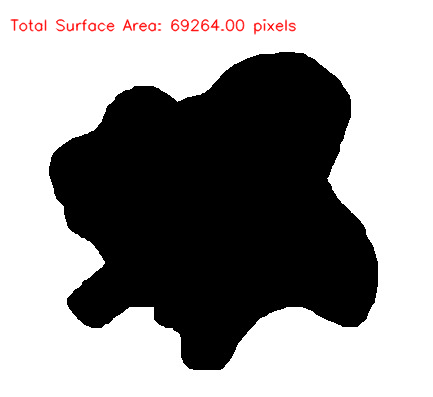

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_surface_area(contours):
    total_surface_area = 0
    for contour in contours:

        area = cv2.contourArea(contour)
        total_surface_area += area

    return total_surface_area

image_files = ['/content/im1.jpg', '/content/im2.jpg', '/content/im3.jpg','/content/im4.jpg','/content/im5.jpg']

for image_file in image_files:
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    inverted_gray = 255 - blurred
    ret, binary_mask = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    total_surface_area = calculate_surface_area(contours)

    if len(contours) > 0:

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, f"Total Surface Area: {total_surface_area:.2f} pixels", (10, 30), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        cv2_imshow(image)
    else:
        print(f"No mineral particles found in {image_file}.")


### All in One(Due to overlapping of images above I have written separate code)

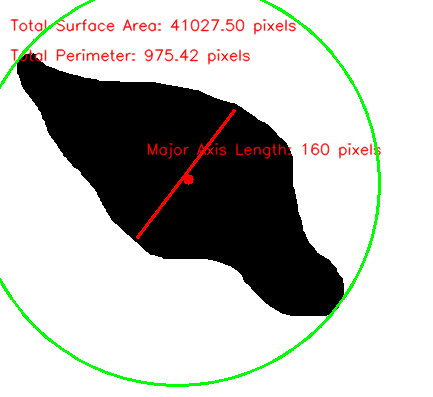

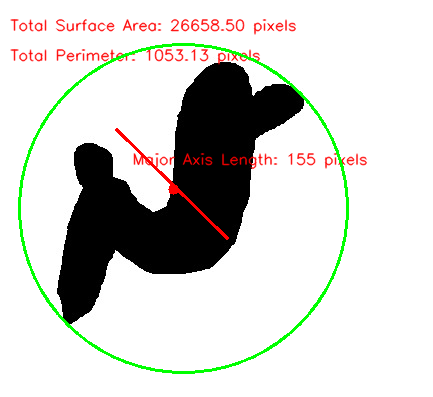

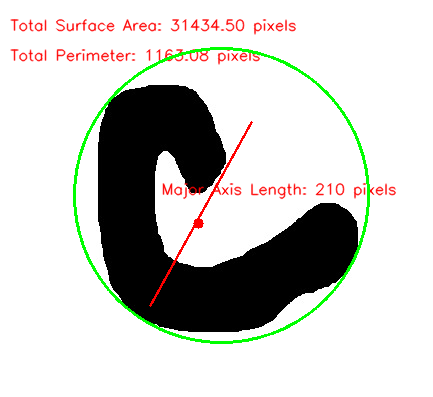

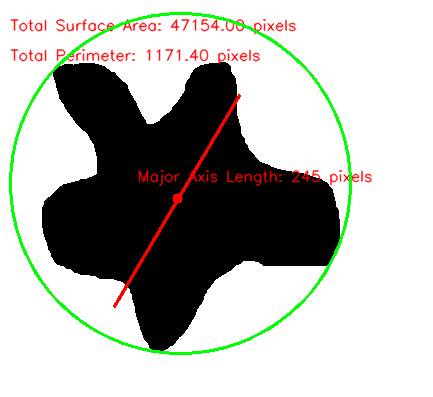

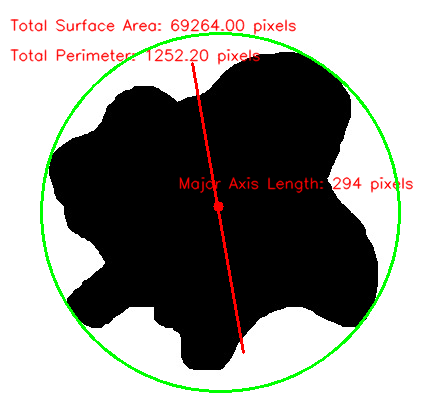

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_major_axis(contours):
    major_axes = []
    for contour in contours:
        if len(contour) >= 5:

            (x0, y0), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
            major_axes.append((x0, y0, major_axis, angle))

    return major_axes

def calculate_surface_area(contours):
    total_surface_area = 0
    for contour in contours:

        area = cv2.contourArea(contour)
        total_surface_area += area

    return total_surface_area


image_files = ['/content/im1.jpg', '/content/im2.jpg', '/content/im3.jpg','/content/im4.jpg','/content/im5.jpg']

for image_file in image_files:
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    inverted_gray = 255 - blurred
    ret, binary_mask = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    major_axes = calculate_major_axis(contours)
    total_surface_area = calculate_surface_area(contours)

    if len(contours) > 0:
        for major_axis_info in major_axes:
            x0, y0, major_axis, angle = major_axis_info
            x0, y0, major_axis = int(x0), int(y0), int(major_axis)
            endpoint1 = (
                int(x0 - 0.5 * major_axis * np.cos(np.radians(angle))),
                int(y0 - 0.5 * major_axis * np.sin(np.radians(angle))
            ))
            endpoint2 = (
                int(x0 + 0.5 * major_axis * np.cos(np.radians(angle))),
                int(y0 + 0.5 * major_axis * np.sin(np.radians(angle))
            ))
            cv2.line(image, endpoint1, endpoint2, (0, 0, 255), 2)
            M = cv2.moments(contours[0])
            if M['m00'] != 0:
                centroid_x = int(M['m10'] / M['m00'])
                centroid_y = int(M['m01'] / M['m00'])
                cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)


        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, f"Total Surface Area: {total_surface_area:.2f} pixels", (10, 30), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        cv2.putText(image, f"Major Axis Length: {major_axis} pixels", (x0 - 40, y0 - 20), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        total_perimeter = 0
        for contour in contours:
            perimeter = cv2.arcLength(contour, True)
            total_perimeter += perimeter
        cv2.putText(image, f"Total Perimeter: {total_perimeter:.2f} pixels", (10, 60), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        for contour in contours:
            if len(contour) >= 5:
                (x, y), radius = cv2.minEnclosingCircle(contour)
                center = (int(x), int(y))
                radius = int(radius)
                cv2.circle(image, center, radius, (0, 255, 0), 2)  # Green circle


        cv2_imshow(image)
    else:
        print(f"No mineral particles found in {image_file}.")
